<a href="https://colab.research.google.com/github/alihussainia/AI-Makerspace/blob/master/PyCaret-Classification/LoanClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [1]:
# fetch requirements.txt and i.txt file 
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/requirements.txt"
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/i.txt"

In [ ]:
!pip install -q reqbar

### `Reqbar`
This will auto pick requirements.txt and install all the packages with a progress bar. if you need to install npm packages too with python ones, create a file named `i.txt` and mention all python packages like you do in requirements.txt but npm packages like `npm:pacakge-name`

In [3]:
import reqbar 

In [ ]:
# to install all the required packages directly from either requirements.txt or i.txt
reqbar.install()

# Imports

In [ ]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# we only need pandas and pycaret
import pandas as pd
from pycaret.classification import *

# to allow interactive charts to shown in colab
from pycaret.utils import enable_colab
enable_colab()

# Dataset


Reference: https://www.kaggle.com/sriharipramod/bank-loan-classification

In [ ]:
# fetch dataset 
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/UniversalBank.csv"

In [ ]:
# reading dataset
dataset = pd.read_csv("UniversalBank.csv")
dataset.head()

In [ ]:
# removing spaces in col names
dataset.columns = [i.replace(" ", "") for i in dataset.columns]
dataset.columns

In [ ]:
# drop columns which are not significant
dataset.drop(["ID","ZIPCode"],axis=1,inplace=True)

In [ ]:
# definign categorical features
cat_cols = ["Family","Education","SecuritiesAccount","CDAccount","Online","CreditCard"] 

In [ ]:
# defining train and test datasets
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

# Model

Reference: https://pycaret.org/classification1/

### [`setup`](https://pycaret.gitbook.io/docs/get-started/functions/initialize#setting-up-environment)
This function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
# initializing the env
exp_1 = setup(data = data, 
                    session_id=123, 
                    target = 'PersonalLoan', 
                    categorical_features=cat_cols,
                    normalize=True, 
                    normalize_method='minmax',
                    transformation=True,
                    use_gpu=True,
                    log_experiment=True,
                    experiment_name='loan1',
                    silent=True) 

### [`compare_models`](https://pycaret.gitbook.io/docs/get-started/functions/train#compare_models)
This function uses all models in the model library and scores them.

In [ ]:
# let's compare 10+ models to find the best match
best = compare_models()

In [ ]:
# have a look at the best model i.e. Random Forest Classifier
print(best)

### [`create_model`](https://pycaret.gitbook.io/docs/get-started/functions/train#create_model)
This function creates a model and scores it.

In [ ]:
# Let's pick the model
rf = create_model('rf', fold = 5, round=4) # model code, cv fold, and rounding upto _ places.

In [ ]:
print(rf)

### [`tune_model`](https://pycaret.gitbook.io/docs/get-started/functions/optimize#tune_model)
This function tunes the hyperparameters of a model and scores it using Stratified Cross Validation.

In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC') # Optimize - Measure used to select the best model through hyperparameter tuning.

### [`plot_model`](https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model)
This function takes a trained model object and returns a plot based on the test / hold-out set.

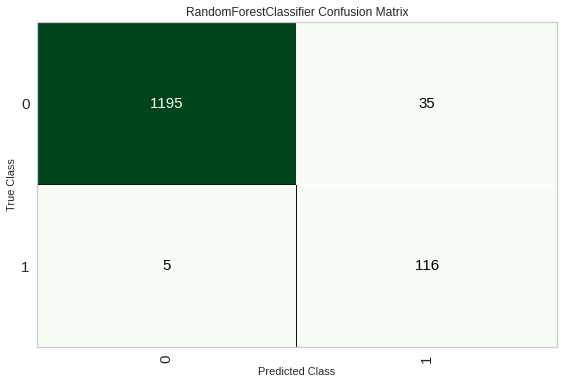

In [19]:
plot_model(tuned_rf, plot = 'confusion_matrix')

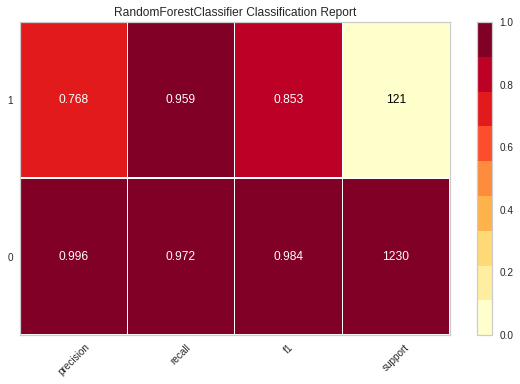

In [20]:
plot_model(tuned_rf, plot = 'class_report')

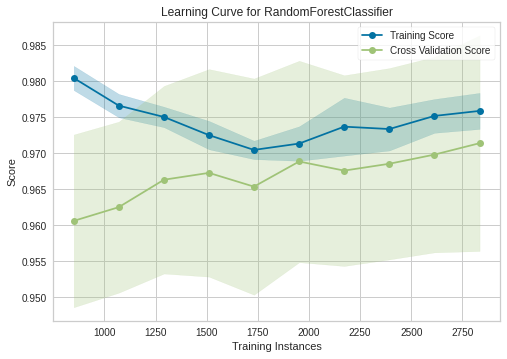

In [ ]:
plot_model(tuned_rf,plot="learning") # takes time

### [`evaluate_model`](https://pycaret.gitbook.io/docs/get-started/functions/analyze#evaluate_model)
This function displays a user interface for all of the available plots for a given estimator. It internally uses the plot_model() function.

In [21]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### [`predict_model`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#predict_model)
This function is used to predict new data using a trained estimator.

In [ ]:
predict_model(tuned_rf)

### [`finalize_model`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#finalize_model)
This function fits the estimator onto the complete dataset passed during the setup() stage.

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
print(final_rf)

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

### [`save_model`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#save_model)
This function saves the transformation pipeline and trained model object into the current active directory as a pickle file for later use.

In [ ]:
save_model(final_rf,'RF_Model_V1')

### [`load_mode`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#load_model)
This function loads a previously saved transformation pipeline and model from the current active directory into the current python environment. Load object must be a pickle file.

In [ ]:
saved_final_rf = load_model('RF_Model_V1')

In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen) # use cmd+R and then enter c:/users/owner/pycaret/ # , drift_report=True

In [ ]:
new_prediction.head() # both above one and this is identical

# Cool Features

### [`convert_model`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#convert_model)


Convert Model into different Language
* 'python'
* 'java'
* 'javascript'
* 'c'
* 'c#'
* 'f#'
* 'go'
* 'haskell'
* 'php'
* 'powershell'
* 'r'
* 'ruby'
* 'vb'
* 'dart'

In [ ]:
# import sys
# sys.setrecursionlimit(2000)

convert_model(final_rf, 'go') # requires sklearn pipeline

### [`create_api`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#create_api)
This function will create a fastAPI instance.

In [ ]:
create_api(saved_final_rf, 'api')

In [ ]:
!python api.py  & npx localtunnel --port 8000 # append /docs in the url

### [`create_docker`](https://pycaret.gitbook.io/docs/get-started/functions/deploy#create_docker)
This function will create a DockerFile of the API.

In [ ]:
create_docker('api')

### [`check_fairness`](https://pycaret.gitbook.io/docs/get-started/functions/analyze#check_fairness)
This will allow to check model fairness with respect to a feature(s).

In [ ]:
#check_fairness(final_lr ['Age']) # fairness with R/O Age.
check_fairness(final_rf, ['Age','Income']) # BEWARE: Time Taking

### `mlflow ui`

This will allow to track experiments.

In [ ]:
# to start the MLFlow server from notebook:
!mlflow ui & npx localtunnel --port 5000            # takes time

# Streamlit 

In [ ]:
!wget -q "https://raw.githubusercontent.com/DigitalProductschool/AI-Makerspace/test/Ali/PyCaret-Classification/streamlit_app.py"

In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501

# Scikit-learn Compatability

In [ ]:
dt = create_model('dt', fold = 5, round=4 )

In [ ]:
from sklearn import tree
tree.plot_tree(dt);

In [ ]:
# plot large img of tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,24)) 
tree.plot_tree(dt, fontsize=10)
plt.show()